In [277]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [279]:
# Create Driver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to the Bristol Cafes page 
page_url = 'https://www.tripadvisor.co.uk/Restaurants-g186220-c8-Bristol_England.html'
driver.get(page_url)

# Click on I Accept Cookies
time.sleep(5) # Wait to load
driver.find_element(By.XPATH, '//button[text()= "I Accept"]').click()

# Find Cafes

cafes = driver.find_elements_by_class_name('OhCyu') # Cafe names 
cafe_links = driver.find_elements_by_class_name('ceUbJ') # Cafe types and  price category

driver.quit()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [/Users/vajdaalexandra/.wdm/drivers/chromedriver/mac64/102.0.5005.61/chromedriver] found in cache
/var/folders/8g/nkh_nv_j2p363bdmfhmjg31h0000gn/T/ipykernel_28060/670030885.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
/var/folders/8g/nkh_nv_j2p363bdmfhmjg31h0000gn/T/ipykernel_28060/670030885.py:14: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  cafes = driver.find_elements_by_class_name('OhCyu') # Cafe names
/var/folders/8g/nkh_nv_j2p363bdmfhmjg31h0000gn/T/ipykernel_28060/670030885.py:15: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  cafe_links

In [235]:
# Get a list of restaurant type
cafe_list = []

for x in range (len(cafe_links)):
    cafess = cafe_links[x].text
    cafe_list.append(cafess)


In [252]:
cafe_type = cafe_list[2::4]
cafe_type = {'Cafe Type':cafe_type}
cafe_type = pd.DataFrame(cafe_type)
cafe_type.head()

,Cafe Type
0,"Italian, Pizza"
1,"Cafe, International"
2,"Quick Bites, Cafe"
3,"Quick Bites, Cafe"
4,"Coffee & Tea, Cafe"


In [251]:
price_cat = cafe_list[3::4]
price_cat = {'Price Category':price_cat}
price_cat = pd.DataFrame(price_cat)
price_cat.head()

,Price Category
0,£
1,££ - £££
2,£
3,££ - £££
4,£


In [2]:
cafe = []
for places in cafes:
    cafe_name = places.text
    cafe.append({'Cafe Name' : cafe_name})

cafe = pd.DataFrame(cafe)
cafe.head()   

NameError: name 'cafes' is not defined

In [259]:
# Add it all up
df = pd.concat([cafe, cafe_type, price_cat], axis=1, join="inner")
df.head()

,Cafe Name,Cafe Type,Price Category
0,1. Taste of Napoli,"Italian, Pizza",£
1,2. The Crafty Egg,"Cafe, International",££ - £££
2,3. Cafe Amore,"Quick Bites, Cafe",£
3,4. Boston Tea Party Park Street,"Quick Bites, Cafe",££ - £££
4,5. Cafe Refectoire,"Coffee & Tea, Cafe",£


In [260]:
df['Rank'] = df['Cafe Name'].str.slice(stop=3) # get rank 
df['Cafe Name']=df['Cafe Name'].str.slice(start=3) # keep name only

In [262]:
df.head()

,Cafe Name,Cafe Type,Price Category,Rank
0,Taste of Napoli,"Italian, Pizza",£,1.
1,The Crafty Egg,"Cafe, International",££ - £££,2.
2,Cafe Amore,"Quick Bites, Cafe",£,3.
3,Boston Tea Party Park Street,"Quick Bites, Cafe",££ - £££,4.
4,Cafe Refectoire,"Coffee & Tea, Cafe",£,5.


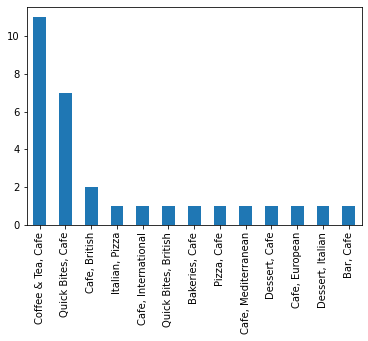

In [281]:
df['Cafe Type'].value_counts().plot(kind="bar")
plt.show()

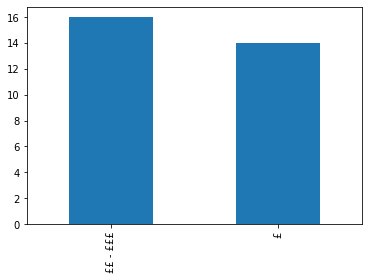

In [282]:
df['Price Category'].value_counts().plot(kind="bar")
plt.show()